In [4]:
import os
import random
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset_root = 'converted_dataset_by_json/'
scenario_type = 'lane_change_towards_right'
start_timestamp = '1621968442850115'

In [16]:
obs_file_list = glob(os.path.join(dataset_root, scenario_type, '*observation*.npy'))
obs_file_list.sort()
obs_file_list

['converted_dataset_by_json/lane_change_towards_right/1621968442850115_observation.npy',
 'converted_dataset_by_json/lane_change_towards_right/1623175977077150_observation.npy',
 'converted_dataset_by_json/lane_change_towards_right/1623180261808263_observation.npy']

In [17]:
lap_file_list = glob(os.path.join(dataset_root, scenario_type, '*look_ahead_pt*.npy'))
lap_file_list.sort()
lap_file_list

['converted_dataset_by_json/lane_change_towards_right/1621968442850115_look_ahead_pt.npy',
 'converted_dataset_by_json/lane_change_towards_right/1623175977077150_look_ahead_pt.npy',
 'converted_dataset_by_json/lane_change_towards_right/1623180261808263_look_ahead_pt.npy']

In [85]:
# load ouput file
with open(dataset_root + scenario_type + f'/{start_timestamp}_look_ahead_pt.npy', 'rb') as f:
    look_ahead_pt_array = np.load(f, allow_pickle=True)
    
look_ahead_pt_array.shape

(126, 3)

In [86]:
# load random input file
with open(dataset_root + scenario_type + f'/{start_timestamp}_observation.npy', 'rb') as f:
    observation = np.load(f, allow_pickle=True)
observation.shape

(126, 101, 8)

In [87]:
len(observation[0][0])

8

# visualize

In [89]:
# random_idx= random.choice(range(len(observation)))
random_idx = 0
frame = observation[random_idx]
look_ahead_pt = look_ahead_pt_array[random_idx+100]

In [90]:
frame

array([[ 6.64779996e+05,  3.99946118e+06,  1.08686184e+00,
         9.52280956e+00, -2.05840972e-01,  5.05756873e-01,
        -3.99595200e-02,  1.00000000e+00],
       [ 6.64776343e+05,  3.99946059e+06,  1.08528962e+00,
         4.63347432e+00,  8.78391648e+00, -1.83748999e-07,
        -1.78036571e-07,  1.00000000e+00],
       [ 6.64773149e+05,  3.99944814e+06,  1.08477276e+00,
         4.43662146e+00,  8.40220969e+00,  2.75001310e-07,
         5.32673320e-07,  1.00000000e+00],
       [ 6.64764663e+05,  3.99947205e+06, -2.05325475e+00,
        -6.63314418e+00, -1.25396521e+01,  1.24217817e-06,
         2.37789452e-06,  1.00000000e+00],
       [ 6.64789589e+05,  3.99947955e+06,  1.08580221e+00,
         4.70921166e+00,  8.94957988e+00, -9.66706943e-08,
        -2.20886030e-07,  1.00000000e+00],
       [ 6.64758391e+05,  3.99944678e+06, -2.00692555e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64764797e+05,  3.999438

In [91]:
ego_pose = frame[0]
objs_pose = frame[1:]
ego_pose

array([ 6.64779996e+05,  3.99946118e+06,  1.08686184e+00,  9.52280956e+00,
       -2.05840972e-01,  5.05756873e-01, -3.99595200e-02,  1.00000000e+00])

In [92]:
objs_pose[:,[0,1,2,3,4]]

array([[ 6.64776343e+05,  3.99946059e+06,  1.08528962e+00,
         4.63347432e+00,  8.78391648e+00],
       [ 6.64773149e+05,  3.99944814e+06,  1.08477276e+00,
         4.43662146e+00,  8.40220969e+00],
       [ 6.64764663e+05,  3.99947205e+06, -2.05325475e+00,
        -6.63314418e+00, -1.25396521e+01],
       [ 6.64789589e+05,  3.99947955e+06,  1.08580221e+00,
         4.70921166e+00,  8.94957988e+00],
       [ 6.64758391e+05,  3.99944678e+06, -2.00692555e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64764797e+05,  3.99943878e+06,  1.07612603e+00,
         4.12394872e+00,  7.59337118e+00],
       [ 6.64754498e+05,  3.99945189e+06, -2.04233353e+00,
        -6.49095774e+00, -1.26421168e+01],
       [ 6.64752285e+05,  3.99946988e+06, -2.03987202e+00,
        -5.47990040e+00, -1.06994458e+01],
       [ 6.64750181e+05,  3.99945165e+06, -2.05439845e+00,
        -7.30035420e+00, -1.41017220e+01],
       [ 6.64776027e+05,  3.99942790e+06,  2.97784387e+00,
         0.00000000e+00

In [93]:
look_ahead_pt

array([6.64811142e+05, 3.99951423e+06, 1.04157440e+01])

In [94]:
ego_pose

array([ 6.64779996e+05,  3.99946118e+06,  1.08686184e+00,  9.52280956e+00,
       -2.05840972e-01,  5.05756873e-01, -3.99595200e-02,  1.00000000e+00])

**!!!ego vx and vy are w.r.t ego coordinate**

In [95]:
ego_vx = ego_pose[3]*np.cos(ego_pose[2]) - ego_pose[4]*np.sin(ego_pose[2])
ego_vy = ego_pose[3]*np.sin(ego_pose[2]) + ego_pose[4]*np.cos(ego_pose[2])

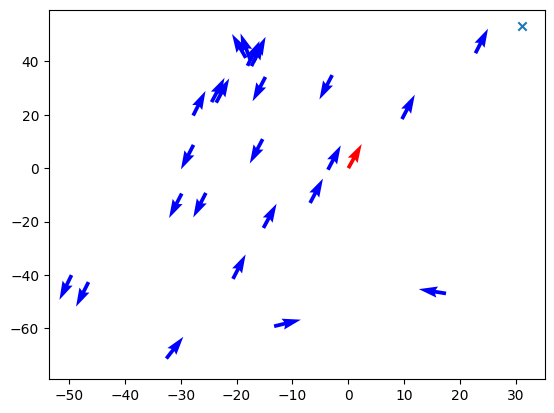

In [96]:
plt.quiver(0, 0, ego_vx, ego_vy, color='r')
plt.scatter(look_ahead_pt[0]-ego_pose[0], look_ahead_pt[1]-ego_pose[1], marker='x')

for obj in objs_pose:
    if obj[-1] == 0:
        continue
    plt.quiver(obj[0]-ego_pose[0], obj[1]-ego_pose[1], obj[3], obj[4], color='b')
    
plt.show()

## utm to bev

In [25]:
import numpy as np

def utm_to_bev(
        pt_utm_array: np.ndarray,
        ego_x_utm: float,
        ego_y_utm: float,
        ego_heading_utm: float
    ) -> np.ndarray:
    """Transform list of UTM points to BEV coordinate.

    Args:
        pt_utm_array (np.ndarray): List of UTM points. [[x, y, heading(Optional)]]
        ego_x_utm (float): Ego car x w.r.t. UTM
        ego_y_utm (float): Ego car y w.r.t. UTM
        ego_heading_utm (float): Ego car heading w.r.t. UTM

    Returns:
        np.ndarray: List of BEV points
    """
    
    def is_heading_provided() -> bool:
        return len(pt_utm_array[0]) > 2

    pt_bev_array = []
    for i in range(len(pt_utm_array)):
        pt_utm_x = pt_utm_array[i][0]
        pt_utm_y = pt_utm_array[i][1]

        pt_x_shifted = pt_utm_x - ego_x_utm
        pt_y_shifted = pt_utm_y - ego_y_utm

        pt_x_rotated = pt_x_shifted * np.cos(ego_heading_utm) \
                        + pt_y_shifted * np.sin(ego_heading_utm)
        pt_y_rotated = - pt_x_shifted * np.sin(ego_heading_utm) \
                        + pt_y_shifted * np.cos(ego_heading_utm)
        
        if is_heading_provided():
            pt_utm_heading = pt_utm_array[i][2]
            pt_heading_rotated = pt_utm_heading - ego_heading_utm
            pt_bev_array.append([pt_x_rotated, pt_y_rotated, pt_heading_rotated])
        else:
            pt_bev_array.append([pt_x_rotated, pt_y_rotated])

    pt_bev_array = np.asarray(pt_bev_array)
    return pt_bev_array

In [65]:
num_objs = 10

ego_bev = np.array([0, 0, 0])
objects_bev = utm_to_bev(objs_pose[0:num_objs,[0,1,2]], *ego_pose[0:3])
objects_v_bev = utm_to_bev(objs_pose[0:num_objs,[3, 4]], *ego_pose[0:3])

objects_v_bev = np.array([
    rotate_vec_2d(obj_v, -ego_pose[2]) for obj_v in objs_pose[0:num_objs,[3, 4]]
])
look_ahead_pt_bev = utm_to_bev([look_ahead_pt[:-1]], *ego_pose[0:3])

In [66]:
objects_bev

array([[ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 9.77192444e+00, -9.67228236e+00,  3.62398125e-01],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 3.96903052e+01,  1.60378825e+01,  1.09806740e+00],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00],
       [ 1.79226368e+06,  3.63432637e+06,  2.84809213e+00]])

In [67]:
objects_v_bev

array([[0.        , 0.        ],
       [1.46306886, 0.56292961],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.48361113, 0.93869568],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [59]:
look_ahead_pt_bev

array([[13.64326021,  1.54475237]])

/home/gac/anaconda3/envs/nuplan/lib/python3.9/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/gac/anaconda3/envs/nuplan/lib/python3.9/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


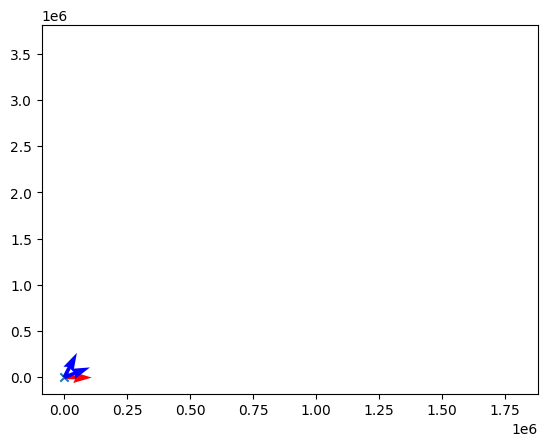

In [62]:
plt.quiver(ego_bev[0], ego_bev[1], ego_pose[3], ego_pose[4], color='r')
# plt.scatter(*objects_bev[:,:2], marker='x')
plt.scatter(*look_ahead_pt_bev[0], marker='x')
for idx in range(len(objects_bev)):
    plt.quiver(objects_bev[idx][0], objects_bev[idx][1], objects_v_bev[idx][0], objects_v_bev[idx][1], color='b')
    
plt.show()

In [55]:
def rotate_vec_2d(
    vec: np.ndarray,
    radian: float,
) -> np.ndarray:
    """ Rotate a 2D vector clockwise.

    Args:
        vec (np.ndarray): Query 2d vector.
        radian (float): Radian to rotate, in rad.

    Returns:
        np.ndarray: Result 2d vector.
    """

    rotation_matrix = np.array([
        [np.cos(radian), -np.sin(radian)],
        [np.sin(radian), np.cos(radian)]
    ])

    return np.matmul(rotation_matrix, vec)

In [32]:
query_vec = np.array([1,0])
rotated_vec = rotate_vec_2d(query_vec, -np.pi/4)

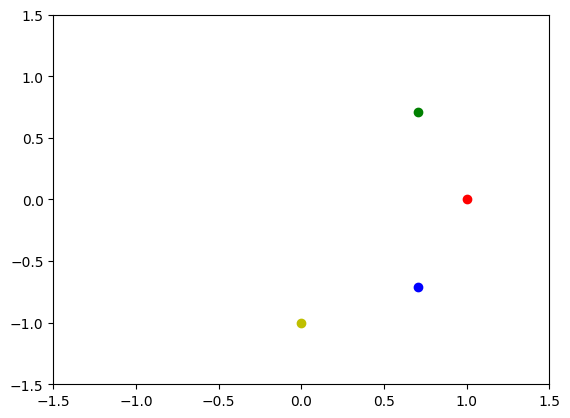

In [33]:
plt.scatter(*query_vec, color='r')
plt.scatter(*rotate_vec_2d(query_vec, 6*np.pi/4), color='y')
plt.scatter(*rotate_vec_2d(query_vec, np.pi/4), color='g')
plt.scatter(*rotate_vec_2d(query_vec, -np.pi/4), color='b')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [34]:
def calculate_distance(
    query_point: np.ndarray,
    reference_point: np.ndarray
) -> float:
    """ Calculate distance between two points of any dimension.

    Args:
        query_point (np.ndarray): The query point.
        reference_point (np.ndarray): The reference point.

    Returns:
        float: distance
    """
    return np.linalg.norm(query_point-reference_point)

In [35]:
observation[0].shape

(101, 8)

In [36]:
selections = observation[0][:, -1].astype(bool)
selections

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [37]:
observation_filtered = observation[0][selections, :]
observation_filtered.shape

(19, 8)

In [38]:
observation[0]

array([[ 6.64193008e+05,  3.99742228e+06, -2.84809213e+00,
         2.43654067e+00, -2.74396942e-02, -2.62394924e-01,
         2.29394978e-01,  1.00000000e+00],
       [ 6.64182870e+05,  3.99742115e+06, -9.35542681e-01,
        -4.00835531e-02, -2.99182167e-02,  3.81003861e-07,
         2.15422651e-07,  1.00000000e+00],
       [ 6.64182565e+05,  3.99742092e+06, -6.96759751e-01,
        -1.04938251e-02, -8.16281147e-03, -3.59425411e-08,
        -3.46029682e-09,  1.00000000e+00],
       [ 6.64180856e+05,  3.99742871e+06, -2.48569400e+00,
        -1.23764543e+00, -9.62129941e-01,  7.46036232e-07,
        -1.10624439e-07,  1.00000000e+00],
       [ 6.64207792e+05,  3.99742658e+06,  3.13002905e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64179252e+05,  3.99741420e+06, -2.42227775e+00,
        -1.67230043e+00, -1.52681010e+00,  2.58245895e-07,
         3.61267585e-08,  1.00000000e+00],
       [ 6.64186204e+05,  3.997406

In [39]:
distance = np.array([calculate_distance(obj_loc, observation[0][0,0:2]) for obj_loc in observation[0][1:, 0:2]])
distance

array([1.02010111e+01, 1.05313970e+01, 1.37493110e+01, 1.53974270e+01,
       1.59528079e+01, 1.74473747e+01, 1.78245843e+01, 1.84320476e+01,
       1.84642332e+01, 2.82483641e+01, 3.42316232e+01, 4.28081068e+01,
       4.40966959e+01, 5.00706116e+01, 5.10159091e+01, 5.80935377e+01,
       6.88385742e+01, 6.99634358e+01, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
       4.05222621e+06, 4.05222621e+06, 4.05222621e+06, 4.05222621e+06,
      

In [40]:
near_selections = distance <= 100
near_selections

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [41]:
def shuffle_objects(observation: np.ndarray) -> np.ndarray:
    return np.random.shuffle(observation[1:, :])

In [42]:
observation[0]

array([[ 6.64193008e+05,  3.99742228e+06, -2.84809213e+00,
         2.43654067e+00, -2.74396942e-02, -2.62394924e-01,
         2.29394978e-01,  1.00000000e+00],
       [ 6.64182870e+05,  3.99742115e+06, -9.35542681e-01,
        -4.00835531e-02, -2.99182167e-02,  3.81003861e-07,
         2.15422651e-07,  1.00000000e+00],
       [ 6.64182565e+05,  3.99742092e+06, -6.96759751e-01,
        -1.04938251e-02, -8.16281147e-03, -3.59425411e-08,
        -3.46029682e-09,  1.00000000e+00],
       [ 6.64180856e+05,  3.99742871e+06, -2.48569400e+00,
        -1.23764543e+00, -9.62129941e-01,  7.46036232e-07,
        -1.10624439e-07,  1.00000000e+00],
       [ 6.64207792e+05,  3.99742658e+06,  3.13002905e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64179252e+05,  3.99741420e+06, -2.42227775e+00,
        -1.67230043e+00, -1.52681010e+00,  2.58245895e-07,
         3.61267585e-08,  1.00000000e+00],
       [ 6.64186204e+05,  3.997406

In [43]:
shuffle_objects(observation[0])

In [44]:
observation[0]

array([[ 6.64193008e+05,  3.99742228e+06, -2.84809213e+00,
         2.43654067e+00, -2.74396942e-02, -2.62394924e-01,
         2.29394978e-01,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64180856e+05,  3.99742871e+06, -2.48569400e+00,
        -1.23764543e+00, -9.62129941e-01,  7.46036232e-07,
        -1.10624439e-07,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64159655e+05,  3.99739545e+06, -1.75002473e+00,
        -1.91361289e-01, -1.03846529e+00,  2.35218074e-07,
         8.44550080e-07,  1.00000000e+00],
       [ 0.00000000e+00,  0.000000

In [45]:
import torch
import torch.nn.functional as F

In [46]:
x = np.array([
    [1.0, 20.0, 40.0, 0.0],
    [10.0, 4.0, 2.0, 1.0],
    [5.0, 12.0, 8.0, 0.0],
])
x

array([[ 1., 20., 40.,  0.],
       [10.,  4.,  2.,  1.],
       [ 5., 12.,  8.,  0.]])

In [47]:
(x.max(axis=0)-x.min(axis=0))

array([ 9., 16., 38.,  1.])

In [48]:
1.0e-12 * np.ones(x.shape[1])

array([1.e-12, 1.e-12, 1.e-12, 1.e-12])

In [49]:
numerator = (x - x.min(axis=0))
denominator = np.maximum(
    (x.max(axis=0)-x.min(axis=0)),
    1.0e-12 * np.ones(x.shape[1])
)

In [50]:
x_norm = numerator/denominator
x_norm

array([[0.        , 1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [0.44444444, 0.5       , 0.15789474, 0.        ]])

In [51]:
np.max([0.0, 1.0e-12])

1e-12

In [52]:
x[:,:-1]

array([[ 1., 20., 40.],
       [10.,  4.,  2.],
       [ 5., 12.,  8.]])

In [53]:
x[x<5] = 0

In [54]:
x

array([[ 0., 20., 40.,  0.],
       [10.,  0.,  0.,  0.],
       [ 5., 12.,  8.,  0.]])